In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h,c,k
from scipy.integrate import trapz
from scipy.interpolate import interp1d

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


(0, 0.9)

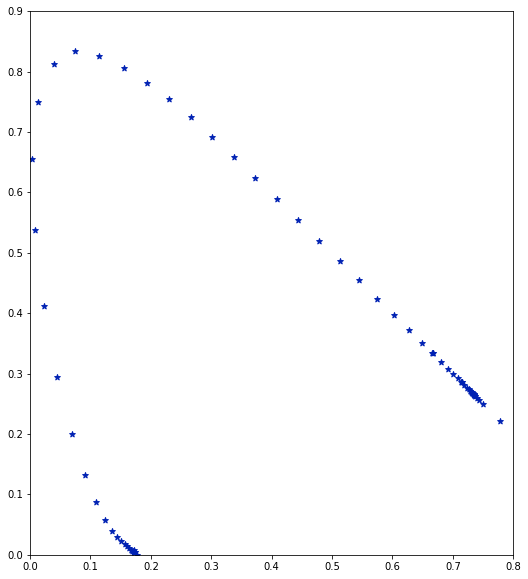

In [2]:
text = np.loadtxt('cie-cmf.txt') #source: https://scipython.com/blog/converting-a-spectrum-to-a-colour/
w_ = text[:,0]
x_ = text[:,1]
y_ = text[:,2]
z_ = text[:,3]

T = x_ + y_ + z_
x = x_/T
y = y_/T
z = z_/T

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x,y, marker = '*', color = '#0021b3') #para lang matingkad kulay
ax.axis('square')
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in true_divide
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in true_divide
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in true_divide


(0, 0.9)

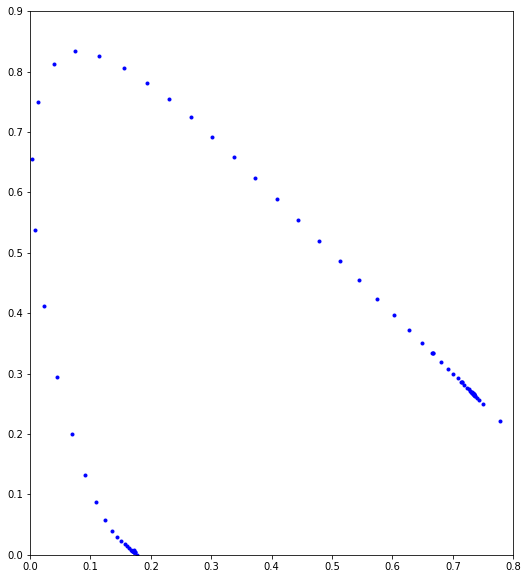

In [11]:
def CIE(M,x_,y_,z_):
    X = trapz(M,x_)
    Y = trapz(M,y_)
    Z = trapz(M,z_)
    T = X + Y + Z
    x = X/T
    y = Y/T
    z = Z/T
    return x,y

text = np.loadtxt('cie-cmf.txt') #source: https://scipython.com/blog/converting-a-spectrum-to-a-colour/
data = np.loadtxt('Group7_data.csv', delimiter = ',', skiprows = 1)

# s_(lambda)
w_ = text[:,0] #380-780
x_ = text[:,1]
y_ = text[:,2]
z_ = text[:,3]
# plt.plot(w_,x_,color = 'red')
# plt.plot(w_,y_,color = 'green')
# plt.plot(w_,z_,color = 'blue')

# M(lambda)
start = 42 #0,6,12,18,24,30,36,42
w_data = data[0:507,start] #380.2-899.7 in itself
r_data = data[0:507,start+1]
g_data = data[0:507,start+3]
b_data = data[0:507,start+5]
# plt.plot(w_data,r_data, color = 'orange')
# plt.plot(w_data,g_data)
# plt.plot(w_data,b_data)

# x_(w_x) -> x_(w_data)
x_func = interp1d(w_,x_)
y_func = interp1d(w_,y_)
z_func = interp1d(w_,z_)
xn = x_func(w_data)
yn = y_func(w_data)
zn = z_func(w_data)
# plt.plot(w_,z_func(w_) + 2)
# plt.plot(w_data,zn)

xr,yr = CIE(r_data,xn,yn,zn)
xg,yg = CIE(g_data,xn,yn,zn)
xb,yb = CIE(b_data,xn,yn,zn)

# print((xr,yr),(xg,yg),(xb,yb))

T = x_ + y_ + z_
x = x_/T
y = y_/T
z = z_/T

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x,y, marker = '.', color = 'blue') #para lang matingkad kulay
ax.scatter([xr,xg,xb],[yr,yg,yb], marker = '.', color = 'red')
ax.axis('square')
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)